# CallArgs EXPERT

Esta tabla contiene la información adicional de las sentencias de tipo Call (llamadas a funciones).  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'callarg__expertise_level'
TARGET_CLASS = 'EXPERT'
full_table = get_data('callargs')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-06-19 20:18:25.306393 Data cache files found ...
2024-06-19 20:18:25.395164 Data cache files successfully loaded!!
The dataset contains 338727 (39.37%) instances for BEGINNER class and 521668 (60.63%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'callargs'
TABLE_FEATURES = ['callarg__number_args', 'callarg__named_args_pct', 'callarg__double_star_args_pct']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

Features shape: (521668, 3)
As we can see the downloaded data contains a total of 521668 instances. For each instance we have 3 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 521668 entries, 338727 to 860394
Data columns (total 3 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   callarg__number_args           521668 non-null  int64  
 1   callarg__named_args_pct        521668 non-null  float64
 2   callarg__double_star_args_pct  521668 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 15.9 MB
None


Cómo podemos ver la tabla está compuesta por 3 variables numéricas y 1 de tipo objeto.

### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [99.96%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

callarg__number_args             0
callarg__named_args_pct          0
callarg__double_star_args_pct    0
dtype: int64

In [6]:
print_empty_cols(X)

callarg__number_args
--------------------
0 instancias no tienen un valor para la columna callarg__number_args


callarg__named_args_pct
-----------------------
0 instancias no tienen un valor para la columna callarg__named_args_pct


callarg__double_star_args_pct
-----------------------------
0 instancias no tienen un valor para la columna callarg__double_star_args_pct




### 2.4 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
callarg__number_args,521668.0,1.338202,1.276275,0.0,1.0,1.0,2.0,96.0
callarg__named_args_pct,521668.0,0.132525,0.309807,0.0,0.0,0.0,0.0,1.0
callarg__double_star_args_pct,521668.0,0.000692,0.017819,0.0,0.0,0.0,0.0,1.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "callarg__number_args": [(0.0, 1.0), (1.0, 1.0), (1.0, 2.0), (2.0, inf)],  # min: 0.0 max: 96.0
    "callarg__named_args_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 1.0
    "callarg__double_star_args_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 1.0
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['callarg__number_args'], 10))
print(get_statistics(X_copy, ['callarg__named_args_pct'], 10))
print(get_statistics(X_copy, ['callarg__double_star_args_pct'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['module__function_defs_pct', 'module__number_of_classes'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
callarg__number_args  count  percentage
           [1.0_1.0] 257562   49.372781
           [2.0_inf] 163179   31.280240
           [0.0_1.0) 100927   19.346979

callarg__named_args_pct  count  percentage
              [0.0_0.0] 432278   82.864581
              [0.0_inf]  89390   17.135419

callarg__double_star_args_pct  count  percentage
                    [0.0_0.0] 520732   99.820576
                    [0.0_inf]    936    0.179424

--- TWO FEATURES ---
--- THREE FEATURES ---


In [9]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (521668, 3)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

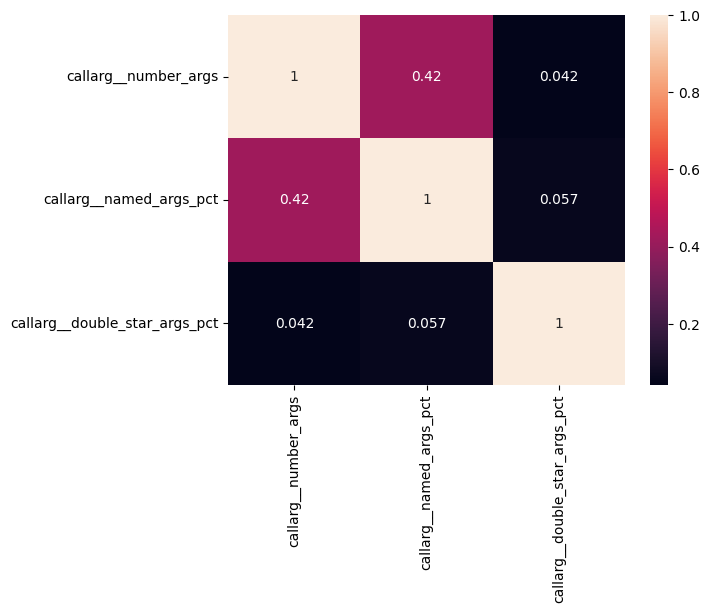

In [10]:
sns.heatmap(X.corr(), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 3 variables (1 numerica y 2 porcentuales) se hara un analisis detallado

### Variable number_args (1/3)
Esta variable representa el número de argumentos de la llamada. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 96. Con una media de 1.33.

<Axes: ylabel='callarg__number_args'>

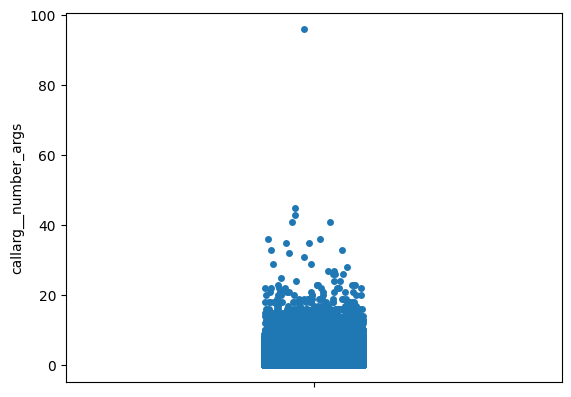

In [11]:
sns.stripplot(X['callarg__number_args'])

### IMPORTANTE
El valor máximo está muy alejado del siguiente.

In [12]:
print_outliers_for_df_column(X, 'callarg__number_args')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9435999886444266
Rango valores atípicos extremos (Tukey): [-2.0,5.0]
Rango valores atípicos leves (Tukey): [-0.5,3.5]
Rango valores atípicos extremos (Fixed BoxPlot): [0.9448189042221601,67.357033516408]
-3.0IQR: 0 instancias tienen un valor para callarg__number_args inferior a -2.0 (Q1-3*IQR) para callarg__number_args. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para callarg__number_args inferior a -0.5 (Q1-1.5*IQR) para callarg__number_args. Representando un 0.0% del total de instancias.
+1.5IQR: 25679 instancias tienen un valor para callarg__number_args superior a 3.5 (Q3+1.5*IQR) para callarg__number_args. Representando un 4.922% del total de instancias.
+3.0IQR: 6853 instancias tienen un valor para callarg__number_args superior a 5.0 (Q3-3*IQR) para callarg__number_args. Representando un 1.314% del total de instancias.
L: 100927 instancias tienen un valor para callarg__number_args 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 5.0 (Con un MC de 91 usamos Tuckey Extremo)

In [13]:
X[X['callarg__number_args'] > 5.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,callarg__number_args,callarg__named_args_pct,callarg__double_star_args_pct
count,6853.000000,6853.000000,6853.000000
mean,7.638844,0.646921,0.001161
std,3.006345,0.399059,0.016980
min,6.000000,0.000000,0.000000
25%,6.000000,0.222222,0.000000
50%,7.000000,0.833333,0.000000
75%,8.000000,1.000000,0.000000
max,96.000000,1.000000,0.853659


### IMPORTANTE
Hay que revisar el valor extremo

### Variable named_args_pct (2/3)
Esta variable representa la proporción de los args que son pasados por nombre. Toma los valores de 0.0 - 1.0. La media es 0.13.

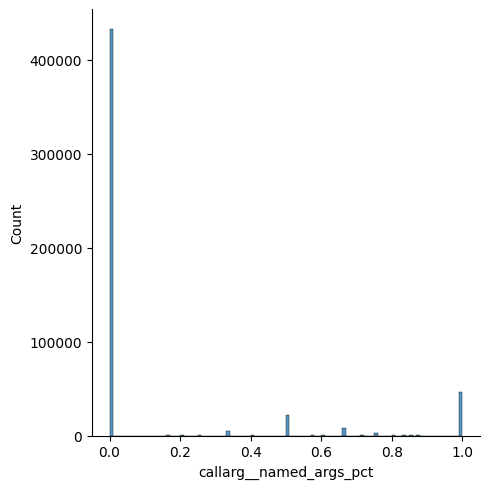

In [14]:
sns.displot(X['callarg__named_args_pct'], bins=[i / 100 for i in range(0, 101)])

In [15]:
print_outliers_for_df_column(X, 'callarg__named_args_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7198548320116742
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para callarg__named_args_pct inferior a 0.0 (Q1-3*IQR) para callarg__named_args_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para callarg__named_args_pct inferior a 0.0 (Q1-1.5*IQR) para callarg__named_args_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 89390 instancias tienen un valor para callarg__named_args_pct superior a 0.0 (Q3+1.5*IQR) para callarg__named_args_pct. Representando un 17.14% del total de instancias.
+3.0IQR: 89390 instancias tienen un valor para callarg__named_args_pct superior a 0.0 (Q3-3*IQR) para callarg__named_args_pct. Representando un 17.14% del total de instancias.
L: 0 instancias tienen un valor para callarg__named_args_pct inferior

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [16]:
X[X['callarg__named_args_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,callarg__number_args,callarg__named_args_pct,callarg__double_star_args_pct
count,89390.000000,89390.000000,89390.000000
mean,2.671026,0.773397,0.003537
std,1.844268,0.253929,0.040327
min,1.000000,0.041667,0.000000
25%,2.000000,0.500000,0.000000
50%,2.000000,1.000000,0.000000
75%,3.000000,1.000000,0.000000
max,96.000000,1.000000,1.000000


### IMPORTANTE
Casi el 82% no tienen argumentos pasados por nombre

### Variable double_star_args_pct (3/3)
Esta variable representa la proporción de args que son double star (**). Toma los valores de 0.0 - 1.0.

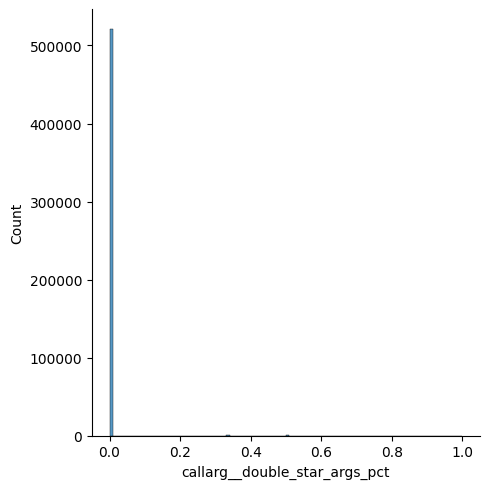

In [17]:
sns.displot(X['callarg__double_star_args_pct'], bins=[i / 100 for i in range(0, 101)])

In [18]:
print_outliers_for_df_column(X, 'callarg__double_star_args_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9802446297838523
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para callarg__double_star_args_pct inferior a 0.0 (Q1-3*IQR) para callarg__double_star_args_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para callarg__double_star_args_pct inferior a 0.0 (Q1-1.5*IQR) para callarg__double_star_args_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 936 instancias tienen un valor para callarg__double_star_args_pct superior a 0.0 (Q3+1.5*IQR) para callarg__double_star_args_pct. Representando un 0.1794% del total de instancias.
+3.0IQR: 936 instancias tienen un valor para callarg__double_star_args_pct superior a 0.0 (Q3-3*IQR) para callarg__double_star_args_pct. Representando un 0.1794% del total de instancias.
L: 0 instancias tienen 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [19]:
X[X['callarg__double_star_args_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,callarg__number_args,callarg__named_args_pct,callarg__double_star_args_pct
count,936.000000,936.000000,936.000000
mean,3.096154,0.548056,0.385511
std,1.982638,0.351756,0.169217
min,1.000000,0.000000,0.047619
25%,3.000000,0.333333,0.333333
50%,3.000000,0.333333,0.333333
75%,3.000000,1.000000,0.333333
max,41.000000,1.000000,1.000000


### IMPORTANTE
El 99,8% no usan double star

## Multivariate

Isolation forest algorithm

In [20]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,callarg__number_args,callarg__named_args_pct,callarg__double_star_args_pct,callarg__expertise_level
340729,12,1.000000,0.0,EXPERT
341745,14,1.000000,0.0,EXPERT
341756,45,1.000000,0.0,EXPERT
341939,14,1.000000,0.0,EXPERT
344324,12,1.000000,0.0,EXPERT
...,...,...,...,...
859512,16,0.000000,0.0,EXPERT
859513,16,0.000000,0.0,EXPERT
859568,10,0.100000,0.0,EXPERT
859569,12,0.083333,0.0,EXPERT


### IMPORTANTE
Revisar los outliers

In [21]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
callarg__number_args,569.0,14.697716,5.773910,7.0,12.000000,13.000000,16.0,96.000000
callarg__named_args_pct,569.0,0.741752,0.387304,0.0,0.428571,0.954545,1.0,1.000000
callarg__double_star_args_pct,569.0,0.006784,0.045943,0.0,0.000000,0.000000,0.0,0.853659


In [22]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
callarg__number_args,521099.0,1.323614,1.182888,0.0,1.0,1.0,2.0,43.0
callarg__named_args_pct,521099.0,0.131859,0.309057,0.0,0.0,0.0,0.0,1.0
callarg__double_star_args_pct,521099.0,0.000685,0.017763,0.0,0.0,0.0,0.0,1.0
